<a href="https://colab.research.google.com/github/youyeon11/class_ai4dl/blob/main/Chapter02_mathemaatical_building_blocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#A first look at a neural network

In [ ]:
#Loading the MNIST dataset in Keras

In [ ]:
import tensorflow

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
#how to use mnist?

tensorflow.keras.datasets.mnist.load_data?

In [ ]:
## Example in python from help

#(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# assert x_train.shape == (60000, 28, 28)
# assert x_test.shape == (10000, 28, 28)
# assert y_train.shape == (60000,)
# assert y_test.shape == (10000,)

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


# train data

In [ ]:
train_images.shape
# x_train에 대한 shape: 600000개의 train data sets와 28pixels*28pixels 조합

(60000, 28, 28)

In [ ]:
len(train_images) #data set 값의 개수, 길이

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# test data

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

#The network architecture

In [ ]:
#how we build the previous model by using the tensorflow model keras?


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model=keras.Sequential([
    layers.Dense(512, activation='relu'), #512 dimension
    layers.Dense(10, activation='softmax') #0~9->10
])

#The complication step

In [ ]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Preparing the image data

In [ ]:
train_images=train_images.reshape((60000, 28*28))
train_images=train_images.astype('float32')/255
test_images=test_images.reshape((10000, 28*28))
test_images=test_images.astype('float32')/255

In [ ]:
train_images.shape #shape가 변화된 것을 확인가능

(60000, 784)

#"Fitting" the model

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 3ms/step - loss: 0.2635 - accuracy: 0.9242
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1078 - accuracy: 0.9681
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0709 - accuracy: 0.9788
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0509 - accuracy: 0.9847
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0389 - accuracy: 0.9887


#Using the model to make predictions

In [ ]:
test_digits=test_images[0:10] #10images
predictions=model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 83ms/step


array([5.4734844e-08, 3.0245328e-08, 6.6790390e-06, 9.5694202e-05,
       1.0453871e-10, 6.5119633e-07, 5.2688201e-12, 9.9988437e-01,
       6.9133847e-07, 1.1832382e-05], dtype=float32)

In [ ]:
test_digits #10 images 확인 가능
#vector of 784

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
test_digits.shape

(10, 784)

In [ ]:
#argmax() : parameter로 들어갈 estimator 추정 가능
predictions[0].argmax()

7

In [ ]:
#asign armax value
predictions[0][7]

0.99988437

In [ ]:
test_labels[0]

7

#Evaluatinng the model on new data seet

In [ ]:
test_loss, test_acc =model.evaluate(test_images, test_labels)
print(f'test_acc: {test_acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0636 - accuracy: 0.9797
test_acc: 0.9797000288963318


#Data representation for neural networks

##Scalars (rank-0 tensors)

In [ ]:
import numpy as np
x=np.array(12)
x

array(12)

In [ ]:
x.ndim

0

##Vectors (rank-1 tensors)

In [ ]:
x=np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [ ]:
x.ndim

1

##Matrices (rank-2 tensors)

In [3]:
x = np.array([[5, 78, 2, 34, 0],[6, 79, 3, 35, 1],[7, 80, 4, 36, 2]])
x.ndim

2

##Rank-3 and higher-rank tensors

In [2]:
import numpy as np
x = np.array([[[5, 78, 2, 34, 0],[6, 79, 3, 35, 1],[7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],[6, 79, 3, 35, 1],[7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],[6, 79, 3, 35, 1],[7, 80, 4, 36, 2]]])
x.ndim

3

#Key attributes

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels)=mnist.load_data()

In [ ]:
#rank-3 -> mnist data
print(train_images.ndim)

3


In [ ]:
print(train_images.shape)

(60000, 28, 28)


In [ ]:
print(train_images.dtype)
#integer type of value

uint8


#Displaying Digits

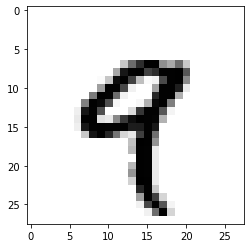

In [ ]:
digit=train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show() #conver data to image

In [ ]:
train_images[4].shape

(28, 28)

In [ ]:
train_images[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
train_labels[4]

9

#Manipulating tensors in Numpy

In [ ]:
#slice와 crop 이전에 본래의 데이터 shape 확인
train_images.shape

(60000, 28, 28)

In [ ]:
my_slice=train_images[10:100]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice=train_images[10:100, : , :] #same with former
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice=train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice=train_images[:, 14: , 14:]
my_slice.shape

(60000, 14, 14)

In [ ]:
my_slice=train_images[:,7:-7,7:-7]
my_slice.shape

(60000, 14, 14)

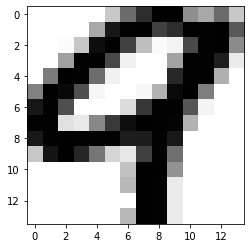

In [ ]:
#convert to image
digit=my_slice[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

#The notion of data batches

In [ ]:
#여기서부터 다시해보기


In [ ]:
def naive_relu(x):
  assert len(x.shape) == 2, 'x.ndim() must 2'
  
  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] = max(x[i, j], 0)
      
  return x

In [ ]:
x=np.array([1,2,3,4])

In [ ]:
len(x.shape)

1

In [ ]:
naive_relu(x)
#shape

AssertionError: ignored

In [ ]:
#ndim 수정 후에 적용
x=np.array([[1,2,3,4],[2,-1,--2,4]])

In [ ]:
len(x.shape)

2

In [ ]:
naive_relu(x)

array([[1, 2, 3, 4],
       [2, 0, 2, 4]])

In [ ]:
#copy 설정

In [ ]:
def naive_relu(x):
  assert len(x.shape) == 2, 'x.ndim() must 2'
  #x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] = max(x[i, j], 0)
      
  return x

In [ ]:
a=np.array([1,2,3,4,5])

In [ ]:
b=a #copy

In [ ]:
b[0]

1

In [ ]:
b[0]=3 #assign new value

In [ ]:
b

array([3, 2, 3, 4, 5])

In [ ]:
a #a is also changed

array([3, 2, 3, 4, 5])

#Element-wise operations

In [ ]:
def naive_relu(x):
  assert len(x.shape) == 2, 'x.ndim() must 2'
  
  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] = max(x[i, j], 0)

  return x

#Broadcasting

In [ ]:
import numpy as np
X=np.random.random((32,10))
y=np.random.random((10,))

In [ ]:
y=np.expand_dims(y,axis=0)

In [ ]:
y.shape

(1, 10)

In [ ]:
Y=np.concatenate([y]*32, axis=0)

In [ ]:
Y.shape

(32, 10)

In [ ]:
Y #32times

array([[0.41183533, 0.68074537, 0.37055692, 0.03670698, 0.55386796,
        0.81770587, 0.74711802, 0.35295999, 0.52606958, 0.6323025 ],
       [0.41183533, 0.68074537, 0.37055692, 0.03670698, 0.55386796,
        0.81770587, 0.74711802, 0.35295999, 0.52606958, 0.6323025 ],
       [0.41183533, 0.68074537, 0.37055692, 0.03670698, 0.55386796,
        0.81770587, 0.74711802, 0.35295999, 0.52606958, 0.6323025 ],
       [0.41183533, 0.68074537, 0.37055692, 0.03670698, 0.55386796,
        0.81770587, 0.74711802, 0.35295999, 0.52606958, 0.6323025 ],
       [0.41183533, 0.68074537, 0.37055692, 0.03670698, 0.55386796,
        0.81770587, 0.74711802, 0.35295999, 0.52606958, 0.6323025 ],
       [0.41183533, 0.68074537, 0.37055692, 0.03670698, 0.55386796,
        0.81770587, 0.74711802, 0.35295999, 0.52606958, 0.6323025 ],
       [0.41183533, 0.68074537, 0.37055692, 0.03670698, 0.55386796,
        0.81770587, 0.74711802, 0.35295999, 0.52606958, 0.6323025 ],
       [0.41183533, 0.68074537, 0.3705569

In [ ]:
#Broadcasting
X+Y

array([[1.40711297, 1.5362073 , 0.69323032, 0.27108327, 1.02940284,
        0.86118765, 1.06332123, 0.93794372, 0.58471984, 1.01713182],
       [0.79008604, 1.30197668, 1.24317164, 0.47923176, 1.15838061,
        1.51526376, 1.36558489, 1.08515994, 1.13528477, 0.82367807],
       [0.68381132, 0.87734387, 1.16116097, 0.87233079, 1.18713905,
        1.22301189, 1.28576607, 1.23155103, 1.16413361, 0.81261764],
       [0.44377158, 1.58130595, 0.46058925, 0.66290831, 1.27832979,
        1.02887804, 1.1940332 , 1.15247904, 1.02512192, 0.81717425],
       [0.89523143, 1.57967735, 0.58593601, 0.7562317 , 0.90644266,
        1.68495869, 0.94647669, 1.15553674, 1.24182729, 0.95311661],
       [1.01549207, 1.54793226, 1.31730839, 0.0830901 , 1.35159072,
        1.2657137 , 0.82341712, 0.59307457, 0.95709977, 1.52112173],
       [0.51989263, 1.02876425, 1.15440098, 0.38933025, 1.09325437,
        1.5597344 , 1.40668852, 1.09498831, 0.73667007, 1.21465174],
       [0.8805026 , 1.31610221, 1.2840488